In [1]:
import random

from importlib import reload
import src.data_loading
import src.graph_utils
import src.cascade_failure
import src.visualization
reload(src.cascade_failure)
reload(src.data_loading)
reload(src.graph_utils)
reload(src.visualization)

from src.data_loading import load_data
from src.graph_utils import calculate_edge_lengths, assign_grid_attributes
from src.cascade_failure import cascade_failure, cascade_simulation
from src.visualization import draw_graph, draw_graph_after_failure


In [2]:
G = load_data()

Graph loaded: 4941 nodes, 6594 edges


### Random edge attack

After attack: 4941 nodes, 6593 edges


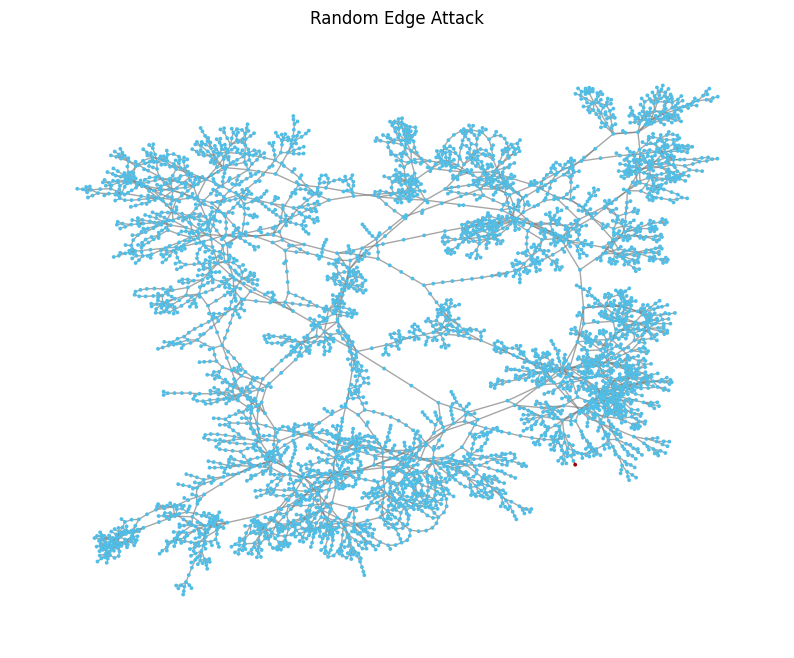

In [44]:
edges_list = list(G.edges())
random_edge = random.choice(edges_list)
initial_failed_edges = []
initial_failed_edges.append(random_edge)
G_after_attack, failed_edges = cascade_failure(graph=G, initial_failed_edges=initial_failed_edges, threshold=0.3)
print(f"After attack: {G_after_attack.number_of_nodes()} nodes, {G_after_attack.number_of_edges()} edges")

draw_graph_after_failure(G_before=G, G_after=G_after_attack, failed_edges=failed_edges, title="Random Edge Attack")

### Random node attack

After attack: 4941 nodes, 6584 edges


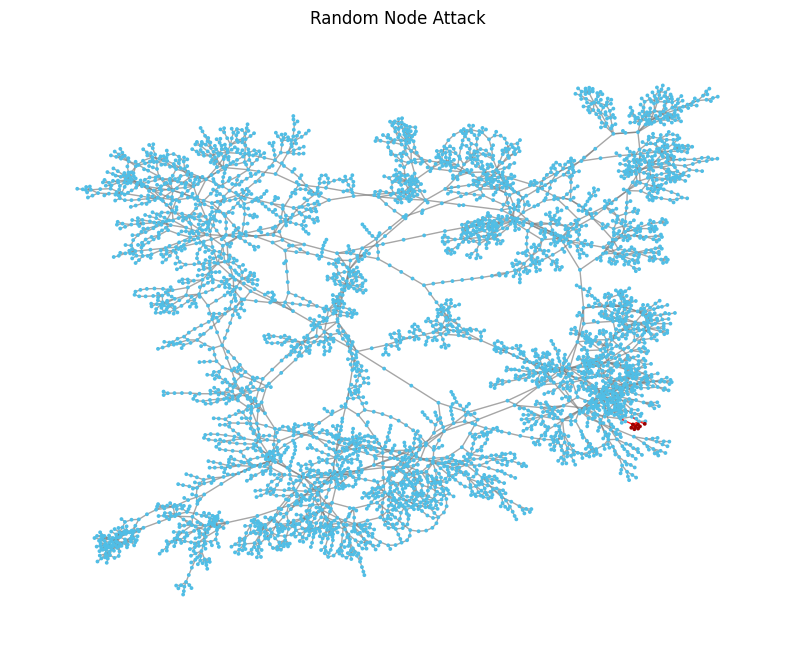

In [45]:
nodes_list = list(G.nodes())
random_node = random.choice(nodes_list)
incident_edges = list(G.edges(random_node))
initial_edges = []
initial_edges.extend(incident_edges)
G_after_attack, failed_edges = cascade_failure(graph=G, initial_failed_edges=initial_edges, threshold=0.2)
print(f"After attack: {G_after_attack.number_of_nodes()} nodes, {G_after_attack.number_of_edges()} edges")

draw_graph_after_failure(G_before=G, G_after=G_after_attack, failed_edges=failed_edges, title="Random Node Attack")

# DC model

In [ ]:
assign_grid_attributes(G, degree_preference="high")

result_after_attack = cascade_simulation(G0=G)

print("Iterations:", len(result_after_attack['history']))
print("Load served fraction:", result_after_attack['load_served_fraction'])
for h in result_after_attack['history']:
    print(h['iteration'], "overloaded:", h['overloaded_count'])

failed_edges = []
for step in result_after_attack['history']:
    failed_edges.extend(step['overloaded_edges'])

draw_graph_after_failure(G_before=G, G_after=result_after_attack['graph'], failed_edges=failed_edges, title="DC Model Cascade Failure High Degree Preference")

{8: [-0.47636353, 0.84697391], 6: [-0.46103965, 0.87625013], 7: [-0.44286497, 0.86248309], 9: [-0.51394334, 0.80726772], 10: [-0.54091005, 0.78653983], 13: [-0.62515378, 1.21771892], 5: [-0.64033359, 1.2279699], 12: [-0.62225221, 1.25290839], 14: [-0.68733234, 1.23912697], 15: [-0.60276396, 1.24048325], 16: [-0.67496422, 1.27106322], 17: [-0.69772971, 1.27278825], 19: [-0.74383364, 1.09164436], 18: [-0.73577977, 1.11615716], 20: [-0.75267267, 1.02395625], 29: [-0.71575518, 1.20589668], 34: [-0.79844258, 0.73898561], 33: [-0.81635608, 0.7226469], 35: [-0.83142904, 0.7609491], 36: [-0.76415418, 0.86092761], 37: [-0.76195365, 0.83764807], 38: [-0.78779406, 0.84473496], 39: [-0.7880513, 0.86914743], 42: [-0.53279558, 0.89476036], 41: [-0.56336493, 1.00034152], 47: [-0.69554032, 0.89417637], 44: [-0.68442922, 0.91311592], 45: [-0.70903819, 0.91429828], 46: [-0.80311205, 0.90750019], 50: [-0.57027991, 0.77202865], 51: [-0.65288573, 1.16567864], 21: [-0.66721109, 1.19584214], 53: [-0.27689742

{8: [-0.47636353, 0.84697391], 6: [-0.46103965, 0.87625013], 7: [-0.44286497, 0.86248309], 9: [-0.51394334, 0.80726772], 10: [-0.54091005, 0.78653983], 13: [-0.62515378, 1.21771892], 5: [-0.64033359, 1.2279699], 12: [-0.62225221, 1.25290839], 14: [-0.68733234, 1.23912697], 15: [-0.60276396, 1.24048325], 16: [-0.67496422, 1.27106322], 17: [-0.69772971, 1.27278825], 19: [-0.74383364, 1.09164436], 18: [-0.73577977, 1.11615716], 20: [-0.75267267, 1.02395625], 29: [-0.71575518, 1.20589668], 34: [-0.79844258, 0.73898561], 33: [-0.81635608, 0.7226469], 35: [-0.83142904, 0.7609491], 36: [-0.76415418, 0.86092761], 37: [-0.76195365, 0.83764807], 38: [-0.78779406, 0.84473496], 39: [-0.7880513, 0.86914743], 42: [-0.53279558, 0.89476036], 41: [-0.56336493, 1.00034152], 47: [-0.69554032, 0.89417637], 44: [-0.68442922, 0.91311592], 45: [-0.70903819, 0.91429828], 46: [-0.80311205, 0.90750019], 50: [-0.57027991, 0.77202865], 51: [-0.65288573, 1.16567864], 21: [-0.66721109, 1.19584214], 53: [-0.27689742

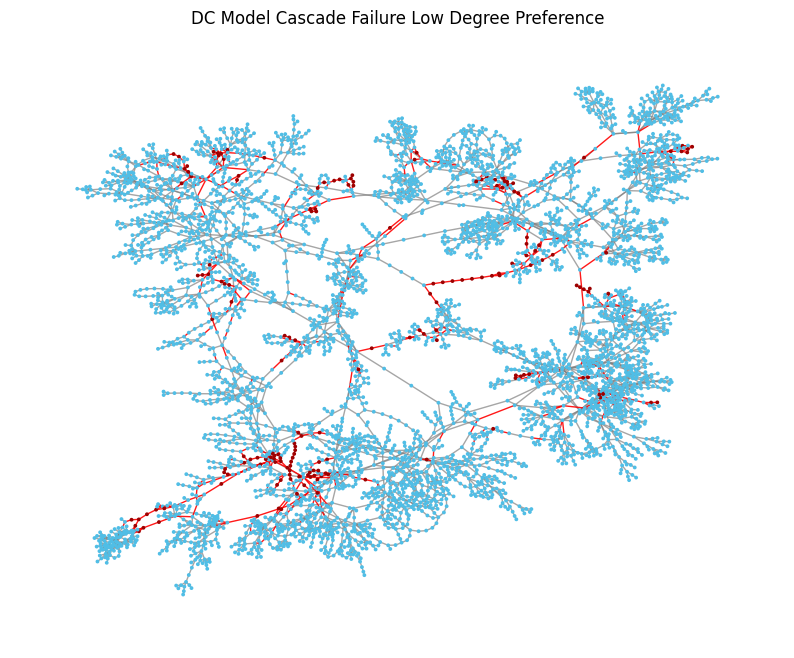

In [47]:
assign_grid_attributes(G, degree_preference="low")

result_after_attack = cascade_simulation(G0=G)

print("Iterations:", len(result_after_attack['history']))
print("Load served fraction:", result_after_attack['load_served_fraction'])
for h in result_after_attack['history']:
    print(h['iteration'], "overloaded:", h['overloaded_count'])

failed_edges = []
for step in result_after_attack['history']:
    failed_edges.extend(step['overloaded_edges'])

draw_graph_after_failure(G_before=G, G_after=result_after_attack['graph'], failed_edges=failed_edges, title="DC Model Cascade Failure Low Degree Preference")

Iterations: 4
Load served fraction: 1.0
0 overloaded: 432
1 overloaded: 8
2 overloaded: 1
3 overloaded: 0


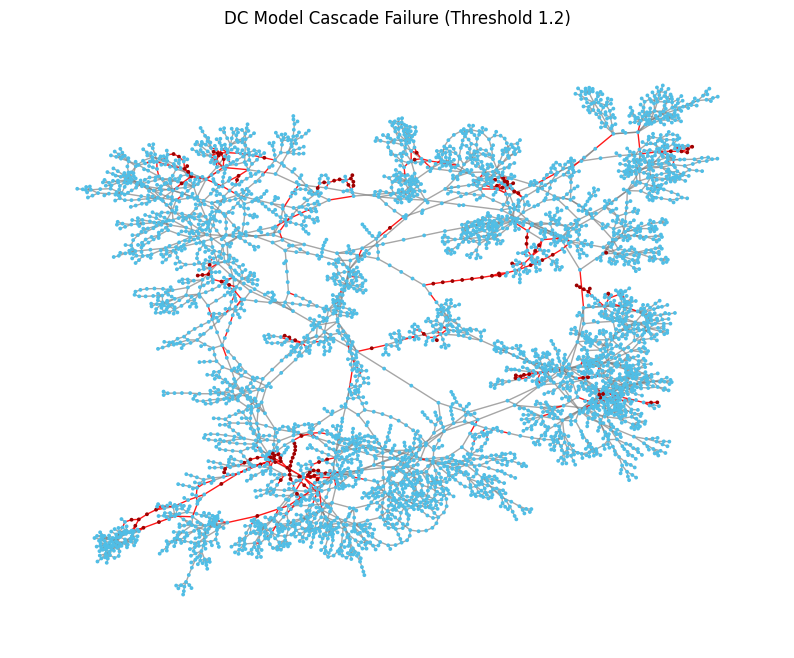

In [48]:
result_after_attack = cascade_simulation(G0=G, trip_threshold=1.2)

print("Iterations:", len(result_after_attack['history']))
print("Load served fraction:", result_after_attack['load_served_fraction'])
for h in result_after_attack['history']:
    print(h['iteration'], "overloaded:", h['overloaded_count'])

failed_edges = []
for step in result_after_attack['history']:
    failed_edges.extend(step['overloaded_edges'])

draw_graph_after_failure(G_before=G, G_after=result_after_attack['graph'], failed_edges=failed_edges, title="DC Model Cascade Failure (Threshold 1.2)")

Iterations: 4
Load served fraction: 1.0
0 overloaded: 327
1 overloaded: 10
2 overloaded: 1
3 overloaded: 0


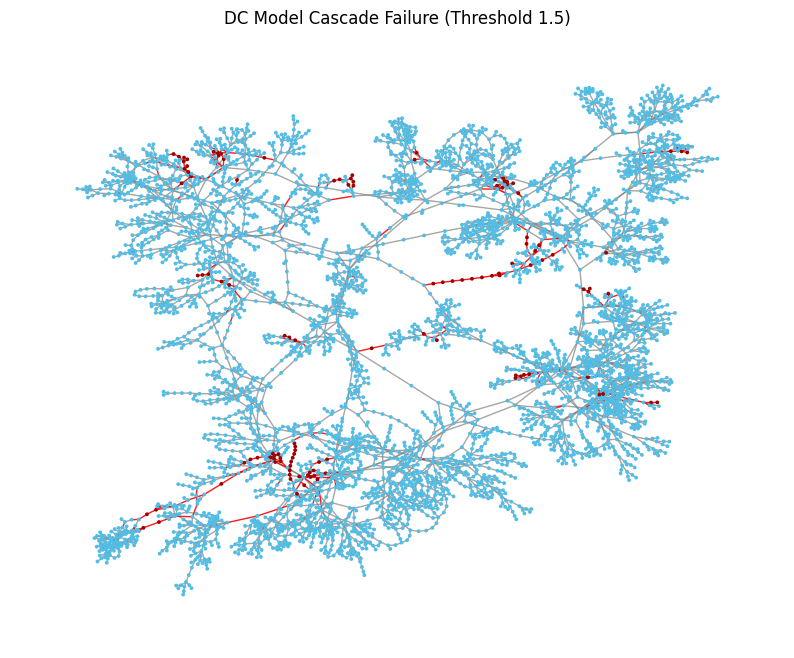

In [49]:
result_after_attack = cascade_simulation(G0=G, trip_threshold=1.5)

print("Iterations:", len(result_after_attack['history']))
print("Load served fraction:", result_after_attack['load_served_fraction'])
for h in result_after_attack['history']:
    print(h['iteration'], "overloaded:", h['overloaded_count'])

failed_edges = []
for step in result_after_attack['history']:
    failed_edges.extend(step['overloaded_edges'])

draw_graph_after_failure(G_before=G, G_after=result_after_attack['graph'], failed_edges=failed_edges, title="DC Model Cascade Failure (Threshold 1.5)")

Iterations: 4
Load served fraction: 1.0
0 overloaded: 26
1 overloaded: 31
2 overloaded: 2
3 overloaded: 0


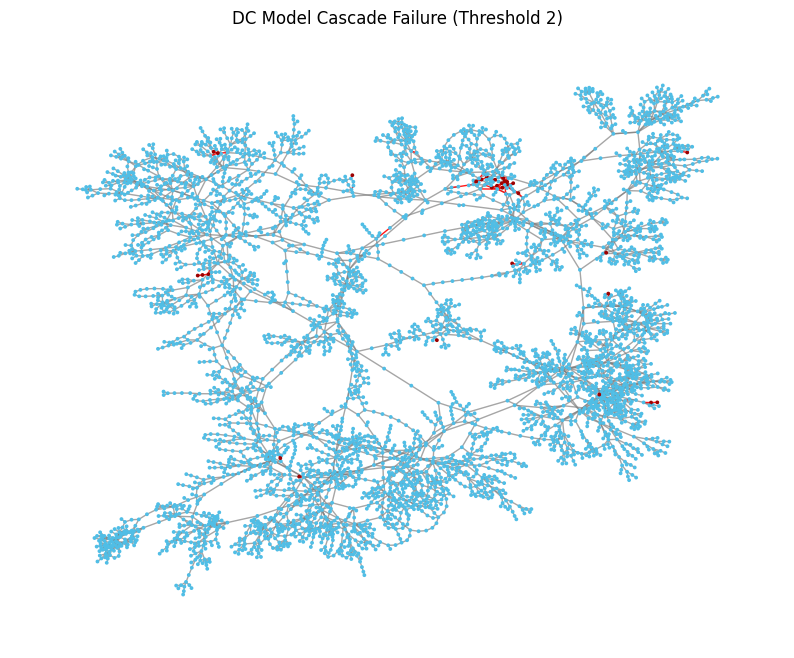

In [50]:
result_after_attack = cascade_simulation(G0=G, trip_threshold=10)

print("Iterations:", len(result_after_attack['history']))
print("Load served fraction:", result_after_attack['load_served_fraction'])
for h in result_after_attack['history']:
    print(h['iteration'], "overloaded:", h['overloaded_count'])

failed_edges = []
for step in result_after_attack['history']:
    failed_edges.extend(step['overloaded_edges'])

draw_graph_after_failure(G_before=G, G_after=result_after_attack['graph'], failed_edges=failed_edges, title="DC Model Cascade Failure (Threshold 2)")